# Open Market Backtesting Daily

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
import wrds
import sys
sys.path.append('..')

# Import Main Python Modules
from src.dataframe_construction import *
from src.a_estimation import *
from src.optimal_strategies import *
from src.backtest import *


#### Backtesting

In [2]:
d = 3000
start_date='1965-01-01'
datapath='../data/'
filename='CRSP_2013_2018_daily_cleaned.h5'
caps_table='dlyprevcap'
returns_table='dlyret'

df = DailyData(d=d, start_date=start_date, datapath=datapath, filename=filename, caps_table=caps_table, returns_table=returns_table)

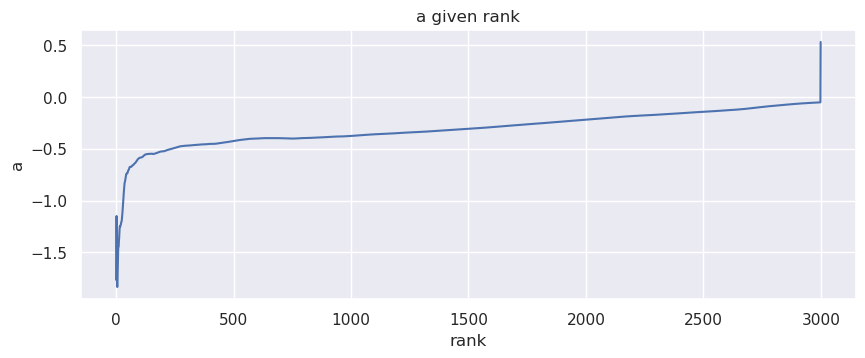

In [18]:
method = 'direct_log'
smooth_method = 'exponential_moving_average'
smooth_parameter = 0.001
a = estimate_a(df.weights_by_rank, smooth_method=smooth_method, smooth_parameter=smooth_parameter)
plot_a(a)

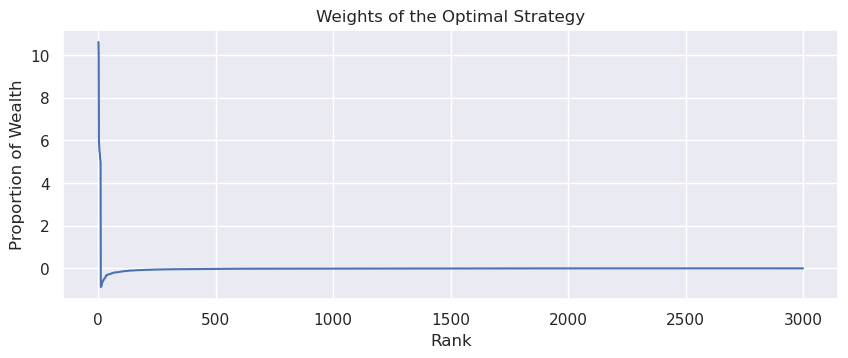

The average return each month was 1.0041


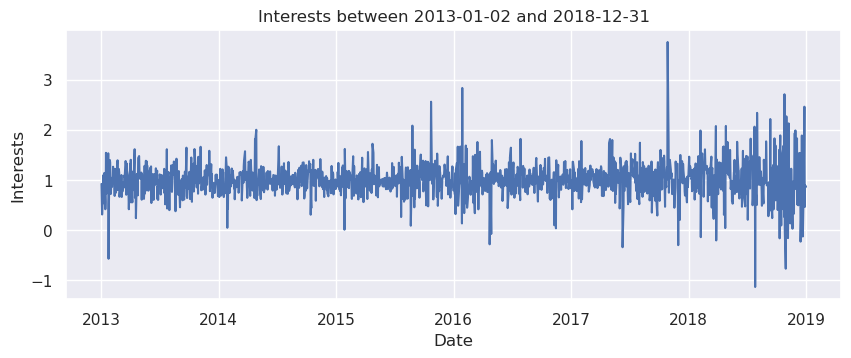

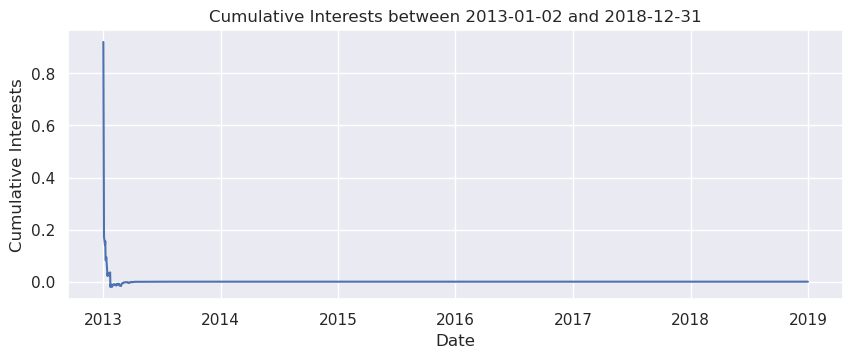

In [19]:
setting = 'mixed'
N = 10
plot_date = '2013-03-20'

strategy = compute_weights_optimal_open(setting=setting, N=N, a=a, weights_by_rank=df.weights_by_rank)
plot_strategy(strategy, plot_date)

backtest = Backtest(strategy=strategy, weights_permno_by_rank=df.weights_permno_by_rank, returns_by_permno=df.returns_by_permno)
    
backtest.run()
print('The average return each month was',round(np.mean(backtest.interests), 4))
backtest.plot_interests()
backtest.plot_cumulative_interests()